0.1 zbadanie zbioru danych

In [3]:
import numpy as np
import pandas as pd
from sklearn import tree

In [41]:
X = pd.read_csv("X.csv")
y = pd.read_csv("y.csv")

In [5]:
print("NaN in X: " + str(X.isna().any().any()) + ", NaN in y: " + str(y.isna().any().any()))
X.describe()

NaN in X: False, NaN in y: False


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-0.990822,1.014808,1.665585,-0.001308,0.998266,0.935226,-1.151749,0.006466,-0.474856,0.482260,...,-0.537654,0.487673,0.991479,-0.485309,0.109168,-0.028626,-1.067992,-0.516966,-0.523011,0.495853
std,2.533538,2.559406,4.169419,2.466601,2.648318,5.649145,4.717559,2.710963,2.567599,2.645808,...,2.474764,2.667311,2.128109,2.454020,7.447092,2.546310,6.903139,2.592681,2.417530,2.568144
min,-12.104230,-9.290618,-15.987696,-10.949135,-9.331294,-24.258505,-23.191849,-10.189523,-10.601337,-11.399415,...,-11.443054,-9.837952,-8.387989,-10.112895,-31.287311,-11.102665,-30.804629,-10.974213,-9.885034,-11.448439
25%,-2.707434,-0.714810,-1.128144,-1.636439,-0.782698,-2.798393,-4.169573,-1.828874,-2.194777,-1.233035,...,-2.199504,-1.324292,-0.410578,-2.141069,-4.731856,-1.719152,-5.736438,-2.246697,-2.169899,-1.191535
50%,-0.983304,1.029255,1.675350,-0.028367,1.001263,0.943060,-1.295579,0.002040,-0.456888,0.576149,...,-0.534837,0.419698,0.979367,-0.467825,0.433366,0.013086,-1.097616,-0.602580,-0.530794,0.547993
75%,0.725665,2.725509,4.466684,1.652345,2.780460,4.743359,1.724221,1.833811,1.218696,2.261885,...,1.177321,2.292517,2.374630,1.208592,5.259142,1.677521,3.602774,1.123501,1.136426,2.239951
max,9.622820,11.149883,17.847301,9.621315,10.563514,25.974307,23.201497,11.018109,9.118540,11.062953,...,8.652609,10.734521,10.637907,9.132670,28.848156,9.973445,28.429306,9.852170,8.665101,10.646244


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=320575)
print("X train set shape: " + str(X_train.shape) + "\nX test set shape: " + str(X_test.shape) + "\ny train set shape: " + str(y_train.shape) + "\ny test set shape: " + str(y_test.shape))

X train set shape: (14000, 22)
X test set shape: (6000, 22)
y train set shape: (14000, 1)
y test set shape: (6000, 1)


0.2 Model 1 - criterion Gini, walidacja z podziałem na 6 zbiorów, bez innych parametrów

In [61]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
model1 = tree.DecisionTreeClassifier(random_state=320575,criterion="gini")
scores_all = []
scores = cross_val_score(model1, X_train, y_train, cv = 6)
print("Mean=%0.4f,\nStd=%0.4f" % (scores.mean(), scores.std()))

Mean=0.8171,
Std=0.0076


In [8]:
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, precision_score
model1 = model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print("MSE=%0.4f,\nAccuracy=%0.4f,\nRecall=%0.4f,\nPrecision=%0.4f" % (mean_squared_error(y_test, y_pred),accuracy_score(y_test,y_pred),recall_score(y_test,y_pred),precision_score(y_test,y_pred)))

MSE=0.1830,
Accuracy=0.8170,
Recall=0.8144,
Precision=0.8199


1. Ponizej przeprowadzę dwie metody wyznaczenia parametru max_depth, min_samples_leaf:

1.1 Wyznaczanie max_depth za pomocą fit, bez kroswalidacji

In [9]:
mse_train = []
mse_test = []
scores = []
accuracies = []
clfs = []
for i in range(2,30):
    model_i = tree.DecisionTreeClassifier(random_state=320575,criterion="gini",max_depth=i)
    model_i = model_i.fit(X_train, y_train)
    y_pred_train_i = model_i.predict(X_train)
    y_pred_test_i = model_i.predict(X_test)
    mse_train.append(mean_squared_error(y_train, y_pred_train_i))
    mse_test.append(mean_squared_error(y_test, y_pred_test_i))
    scores.append(model_i.score(X_test, y_test))
    clfs.append(model_i)

Najlepsza wartość max_depth = 12


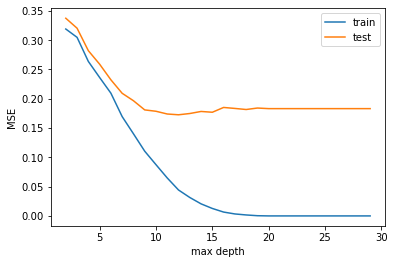

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(2,30), mse_train, label="train")
plt.plot(range(2,30), mse_test, label="test")
plt.xlabel("max depth")
plt.ylabel("MSE")
plt.legend()
best_depth_mse = range(2,30)[mse_test.index(min(mse_test))]
print("Najlepsza wartość max_depth = %i" % best_depth_mse)

Najlepsza wartość max_depth = 12


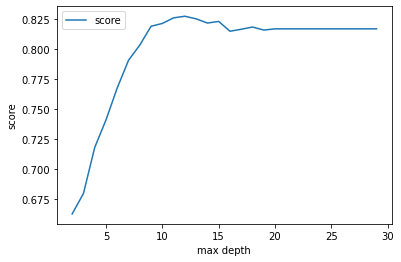

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(2,30), scores, label="score")
plt.xlabel("max depth")
plt.ylabel("score")
plt.legend()

best_max_depth = range(2, 30)[scores.index(max(scores))]
print("Najlepsza wartość max_depth = %i" % best_max_depth)

1.2 Po wartościach mse i scorów dla zbioru treningowego otrzymaliśmy, ze najlepszy parametr dla depth to 12
Kroswalidacja dla parametru max_depth = 12, criterion "gini"

In [12]:
model2 = tree.DecisionTreeClassifier(random_state=320575,criterion="gini", max_depth=12)
scores_depth12 = cross_val_score(model2, X_train, y_train, cv = 6)
print("Mean=%0.4f,\nStd=%0.4f" % (scores_depth12.mean(), scores_depth12.std()))

Mean=0.8230,
Std=0.0048


1.3 Dla otrzymanego parametru max_depth = 12 badam teraz jaki jest najlepszy parametr min_samples_leaf

In [13]:
mse_train = []
mse_test = []
scores = []
accuracies = []
clfs = []
for i in range(2,15):
    model_i = tree.DecisionTreeClassifier(random_state=320575,criterion="gini", min_samples_leaf=i, max_depth=12)
    model_i = model_i.fit(X_train, y_train)
    y_pred_train_i = model_i.predict(X_train)
    y_pred_test_i = model_i.predict(X_test)
    mse_train.append(mean_squared_error(y_train, y_pred_train_i))
    mse_test.append(mean_squared_error(y_test, y_pred_test_i))
    scores.append(model_i.score(X_test, y_test))
    clfs.append(model_i)


Najlepsza wartość min_samples_leaf = 3


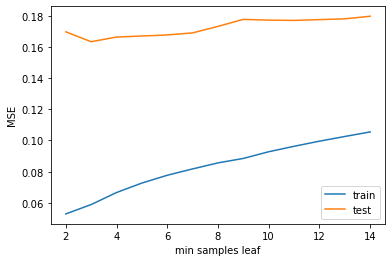

In [14]:
plt.plot(range(2,15), mse_train, label="train")
plt.plot(range(2,15), mse_test, label="test")
plt.xlabel("min samples leaf")
plt.ylabel("MSE")
plt.legend()
best_samples = range(2,15)[mse_test.index(min(mse_test))]
print("Najlepsza wartość min_samples_leaf = %i" % best_samples)

Najlepsza wartość min_samples_leaf = 3


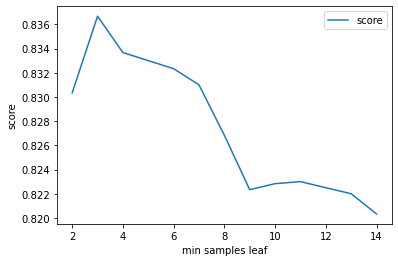

In [15]:
plt.plot(range(2,15), scores, label="score")
plt.xlabel("min samples leaf")
plt.ylabel("score")
plt.legend()
best_samples_score = range(2,15)[mse_test.index(min(mse_test))]
print("Najlepsza wartość min_samples_leaf = %i" % best_samples_score)

1.4 Za pomocą powyzszych metod otrzymaliśmy max_depth = 12, min_samples_leaf = 3 przy criterion="gini"
Sprawdzmy skuteczność takiego modelu za pomocą kroswalidacji:

In [16]:
model_metoda1 = tree.DecisionTreeClassifier(random_state=320575, criterion="gini", min_samples_leaf=3, max_depth=12)
scores_metoda1 = cross_val_score(model_i, X_train, y_train, cv=6)
print("Średnia wyznaczona za pomocą metody 1: %f\nOdchylenie standardowe: %f" % (scores_metoda1.mean(),scores_metoda1.std()))

Średnia wyznaczona za pomocą metody 1: 0.822072
Odchylenie standardowe: 0.003569


2.1 Wyznaczanie max_depth i min_samples_leaf za pomocą kroswalidacji dla entropy

In [17]:
# Wyznaczanie parametru max_depth
mean_scores = []
max_depth_values = range(1,15)

for max_depth in range(1,15):
    model_i = tree.DecisionTreeClassifier(random_state=320575,criterion="entropy",max_depth=max_depth)
    scores = cross_val_score(model_i, X_train, y_train, cv=6)  
    mean_score = scores.mean()
    mean_scores.append(mean_score)

best_max_depth = max_depth_values[mean_scores.index(max(mean_scores))]
print("Najlepsza wartość max_depth = %i" % best_max_depth)

Najlepsza wartość max_depth = 11


In [20]:
# Wyznaczanie parametru min_leaf_depth
mean_scores = []
min_samples_values = range(2,15)

for min_samples in range(2,15):
    model_i = tree.DecisionTreeClassifier(random_state=320575,criterion="entropy",min_samples_leaf=min_samples)
    scores = cross_val_score(model_i, X_train, y_train, cv=6)  
    mean_score = scores.mean()
    mean_scores.append(mean_score)

min_samples = min_samples_values[mean_scores.index(max(mean_scores))]
print("Najlepsza wartość min_samples_leaf = %i" % min_samples)

Najlepsza wartość min_samples_leaf = 8


2.2 Ocena modelu dla max_depth = 11, min_samples_leaf=8

In [23]:
model3 = tree.DecisionTreeClassifier(random_state=320575,criterion="entropy",max_depth=11, min_samples_leaf=8)
scores_depth11 = cross_val_score(model_i, X_train, y_train, cv=6)  
print("Średnia wyznaczona za pomocą kroswalidacji: %f, odchylenie standardowe: %f" % (scores_depth11.mean(),scores_depth11.std()))

Średnia wyznaczona za pomocą kroswalidacji: 0.819356, odchylenie standardowe: 0.005367


3.1 Dodatkowe parametry - min_samples_split, max_features
Na najlepszym modelu spróbujemy dodać nowe parametry aby wzmocnic jego skutecznosc

In [363]:
# Wyznaczanie parametru min_samples_split
mean_scores = []
min_samples_split_values = range(2,15)

for i in range(2,15):
    model_i = tree.DecisionTreeClassifier(random_state=320575,criterion="gini",min_samples_leaf=3, max_depth=12, min_samples_split=i)
    scores = cross_val_score(model_i, X_train, y_train, cv=6)  
    mean_score = scores.mean()
    mean_scores.append(mean_score)

min_split = min_samples_split_values[mean_scores.index(max(mean_scores))]
print("Najlepsza wartość min_samples_split = %i" % min_split)

Najlepsza wartość min_samples_leaf = 11


In [25]:
# Wyznaczanie parametru max_features
mean_scores = []
max_features_values = range(2,15)

for i in range(2,15):
    model_i = tree.DecisionTreeClassifier(random_state=320575,criterion="gini",min_samples_leaf=3, max_depth=12, min_samples_split=11, max_features=i)
    scores = cross_val_score(model_i, X_train, y_train, cv=6)  
    mean_score = scores.mean()
    mean_scores.append(mean_score)

max_feature = max_features_values[mean_scores.index(max(mean_scores))]
print("Najlepsza wartość max_features = %i" % max_feature)

Najlepsza wartość max_features = 11


4.1 Za pomocą powyzszych metod otrzymaliśmy najlepsze drzewo dla max_depth = 12, min_samples_leaf = 3 przy criterion="gini"
Dalsze wyniki przeprowadzamy na takim drzewie

In [26]:
Model = tree.DecisionTreeClassifier(random_state=320575, max_depth = 12, min_samples_leaf=3, criterion = "gini")
Model2 = tree.DecisionTreeClassifier(random_state=320575, max_depth = 11, min_samples_leaf=8, criterion = "entropy")
Model3 =tree.DecisionTreeClassifier(random_state=320575,criterion="gini",min_samples_leaf=3, max_depth=12, min_samples_split=11, max_features=11) 

In [27]:
Model.fit(X_train, y_train)
print("Wynik modelu 1: %0.04f" % Model.score(X_test,y_test))
Model2.fit(X_train, y_train)
print("Wynik modelu 2: %0.04f" % Model2.score(X_test,y_test))
Model3.fit(X_train, y_train)
print("Wynik modelu 3: %0.04f" % Model3.score(X_test,y_test))

Wynik modelu 1: 0.8367
Wynik modelu 2: 0.8170
Wynik modelu 3: 0.8213


In [375]:
y_pred = Model.predict(X_test)
print("Model 1:")
print("MSE=%0.4f,\nAccuracy=%0.4f,\nRecall=%0.4f,\nPrecision=%0.4f" % (mean_squared_error(y_test, y_pred),accuracy_score(y_test,y_pred),recall_score(y_test,y_pred),precision_score(y_test,y_pred)))
y_pred2 = Model2.predict(X_test)
print("\nModel 2:")
print("MSE=%0.4f,\nAccuracy=%0.4f,\nRecall=%0.4f,\nPrecision=%0.4f" % (mean_squared_error(y_test, y_pred2),accuracy_score(y_test,y_pred2),recall_score(y_test,y_pred2),precision_score(y_test,y_pred2)))
y_pred3 = Model3.predict(X_test)
print("\nModel 3:")
print("MSE=%0.4f,\nAccuracy=%0.4f,\nRecall=%0.4f,\nPrecision=%0.4f" % (mean_squared_error(y_test, y_pred3),accuracy_score(y_test,y_pred3),recall_score(y_test,y_pred3),precision_score(y_test,y_pred3)))

Model 1:
MSE=0.1633,
Accuracy=0.8367,
Recall=0.8420,
Precision=0.8342

Model 2:
MSE=0.1847,
Accuracy=0.8153,
Recall=0.8161,
Precision=0.8161

Model 3:
MSE=0.1787,
Accuracy=0.8213,
Recall=0.8244,
Precision=0.8206


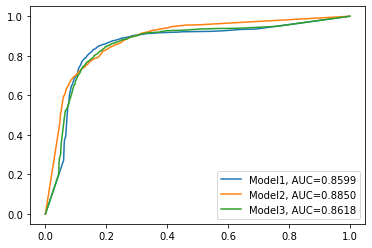

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred = Model.predict_proba(X_test)
y_pred2 = Model2.predict_proba(X_test)
y_pred3 = Model3.predict_proba(X_test)
fpr, tpr, tresholds = roc_curve(y_test, y_pred[:,1])
plt.plot(fpr, tpr, label="Model1, AUC=%0.4f" % roc_auc_score(y_test,y_pred[:,1]))
fpr, tpr, tresholds = roc_curve(y_test, y_pred2[:,1])
plt.plot(fpr,tpr,label = "Model2, AUC=%0.4f" % roc_auc_score(y_test,y_pred2[:,1]))
fpr, tpr, tresholds = roc_curve(y_test, y_pred3[:,1])
plt.plot(fpr,tpr,label = "Model3, AUC=%0.4f" % roc_auc_score(y_test,y_pred3[:,1]))
plt.legend()


In [29]:
from sklearn.metrics import confusion_matrix
y_pred = Model.predict(X_test)
y_pred2 = Model2.predict(X_test)
y_pred3 = Model3.predict(X_test)
print("Macierz pomyłek modelu 1: " + str(confusion_matrix(y_test, y_pred)))
print("Macierz pomyłek modelu 2: " + str(confusion_matrix(y_test, y_pred2)))
print("Macierz pomyłek modelu 3: " + str(confusion_matrix(y_test, y_pred3)))


Macierz pomyłek modelu 1: [[2484  504]
 [ 476 2536]]
Macierz pomyłek modelu 2: [[2424  564]
 [ 534 2478]]
Macierz pomyłek modelu 3: [[2445  543]
 [ 529 2483]]


5.1 Inne parametry - cppalha

5.2 w tym celu najpierw podzielimy zbiory na walidacyjny, testowy, treningowy

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)
Tree = tree.DecisionTreeClassifier(random_state=320575)
path = Tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
clfs = []
for ccp_alpha in ccp_alphas:
    Tree = tree.DecisionTreeClassifier(random_state=320575, ccp_alpha=ccp_alpha)
    Tree.fit(X_train, y_train)
    clfs.append(Tree)

5.3 Wyznaczenie najlepszego parametru ccpalpha:

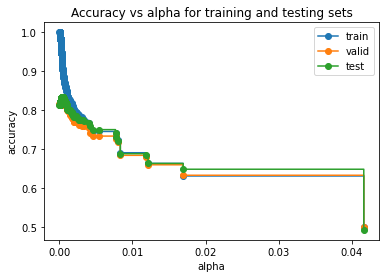

In [31]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid, y_valid) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker="o", label="valid", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()
alpha_opt = max(ccp_alphas[valid_scores==np.max(valid_scores)])

In [35]:
alpha_opt = max(ccp_alphas[valid_scores==np.max(valid_scores)])
print("Best alpha=%0.8f" % alpha_opt)

Best alpha=0.00029221


In [44]:
X2 = np.concatenate((X_train, X_valid), axis=0)
y2 = np.concatenate((y_train, y_valid), axis=0) 
model4 = tree.DecisionTreeClassifier(random_state=320575, ccp_alpha=alpha_opt) 
model4 = model4.fit(X2, y2) 
model4.score(X_test, y_test) # zbiory z podziału 7:3 z początku kodu

0.842

In [57]:
# Wyznaczanie parametru max_depth i min_samples_leaf w jednej podwójnej pętli do dobranego ccp_alpha
mean_scores = np.empty((15, 8))
df = pd.DataFrame(mean_scores)
max_features_values = range(2,10)

np.set_printoptions(precision=4, suppress=True)
for depth in range(2,17):
    for split in range(2,10):
        model_i = tree.DecisionTreeClassifier(random_state=320575,criterion="gini", max_depth=depth, min_samples_leaf=split, ccp_alpha=alpha_opt)
        scores = cross_val_score(model_i, X_train, y_train, cv=6)  
        mean_score = scores.mean()
        mean_scores[depth-2, split-2] = mean_score

print(mean_scores)
i, j = np.unravel_index(np.argmax(mean_scores), mean_scores.shape)
print(str(i) + " " + str(j))
print(mean_scores[i,j])

[[0.6778 0.6778 0.6778 0.6778 0.6778 0.6778 0.6778 0.6778]
 [0.6901 0.6901 0.6901 0.6901 0.6901 0.6901 0.6901 0.6901]
 [0.7275 0.7275 0.7276 0.7276 0.7276 0.7276 0.7277 0.7276]
 [0.7518 0.7518 0.7516 0.7517 0.7518 0.752  0.7521 0.7521]
 [0.7783 0.7784 0.7783 0.7781 0.7781 0.7782 0.7785 0.7778]
 [0.8023 0.8023 0.8024 0.8023 0.8024 0.8025 0.8028 0.8024]
 [0.8141 0.8132 0.8136 0.8129 0.8131 0.8129 0.8132 0.8127]
 [0.8211 0.8216 0.8203 0.8205 0.8206 0.8208 0.8206 0.82  ]
 [0.8286 0.8268 0.8259 0.8262 0.8258 0.8257 0.8263 0.8234]
 [0.8289 0.8299 0.8289 0.8276 0.8276 0.8285 0.8281 0.8268]
 [0.8316 0.8317 0.8295 0.8292 0.8297 0.8309 0.8301 0.8273]
 [0.8335 0.8321 0.8308 0.8304 0.8304 0.8316 0.8303 0.8288]
 [0.8326 0.8327 0.8309 0.8309 0.8309 0.8319 0.8308 0.8276]
 [0.8334 0.8324 0.8316 0.8314 0.8319 0.8324 0.8304 0.8291]
 [0.8325 0.8329 0.8323 0.8304 0.8314 0.8324 0.8301 0.8289]]
11 0
0.8335006359703976


5.4 model4 - podsumowanie wyników

In [62]:
model4 = tree.DecisionTreeClassifier(random_state=320575, ccp_alpha=alpha_opt, max_depth = 13, min_samples_leaf=2, criterion = "gini")
model4.fit(X_train, y_train)
print("Model 4:")
print("Wynik modelu 4: %0.04f" % model4.score(X_test,y_test))
y_pred5 = model4.predict_proba(X_test)
print("Wynik pola pod wykresem roc: " + str(roc_auc_score(y_test,y_pred5[:,1])))
y_pred5 = model4.predict(X_test)
print("MSE=%0.4f,\nAccuracy=%0.4f,\nRecall=%0.4f,\nPrecision=%0.4f" % (mean_squared_error(y_test, y_pred5),accuracy_score(y_test,y_pred5),recall_score(y_test,y_pred5),precision_score(y_test,y_pred5)))
print("Macierz pomyłek modelu 5: " + str(confusion_matrix(y_test, y_pred5)))

Model 4:
Wynik modelu 4: 0.8323
Wynik pola pod wykresem roc: 0.8789898416152436
MSE=0.1677,
Accuracy=0.8323,
Recall=0.8403,
Precision=0.8282
Macierz pomyłek modelu 5: [[2463  525]
 [ 481 2531]]


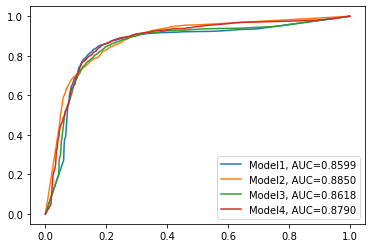

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred = Model.predict_proba(X_test)
y_pred2 = Model2.predict_proba(X_test)
y_pred3 = Model3.predict_proba(X_test)
y_pred4 = model4.predict_proba(X_test)
fpr, tpr, tresholds = roc_curve(y_test, y_pred[:,1])
plt.plot(fpr, tpr, label="Model1, AUC=%0.4f" % roc_auc_score(y_test,y_pred[:,1]))
fpr, tpr, tresholds = roc_curve(y_test, y_pred2[:,1])
plt.plot(fpr,tpr,label = "Model2, AUC=%0.4f" % roc_auc_score(y_test,y_pred2[:,1]))
fpr, tpr, tresholds = roc_curve(y_test, y_pred3[:,1])
plt.plot(fpr,tpr,label = "Model3, AUC=%0.4f" % roc_auc_score(y_test,y_pred3[:,1]))
fpr, tpr, tresholds = roc_curve(y_test, y_pred4[:,1])
plt.plot(fpr,tpr,label = "Model4, AUC=%0.4f" % roc_auc_score(y_test,y_pred4[:,1]))
plt.legend()


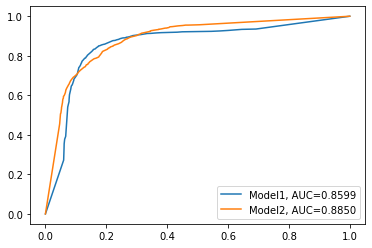

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred = Model.predict_proba(X_test)
y_pred2 = Model2.predict_proba(X_test)
fpr, tpr, tresholds = roc_curve(y_test, y_pred[:,1])
plt.plot(fpr, tpr, label="Model1, AUC=%0.4f" % roc_auc_score(y_test,y_pred[:,1]))
fpr, tpr, tresholds = roc_curve(y_test, y_pred2[:,1])
plt.plot(fpr,tpr,label = "Model2, AUC=%0.4f" % roc_auc_score(y_test,y_pred2[:,1]))
plt.legend()